In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
idols = pd.read_csv('kpop_idols.csv')
girl_groups = pd.read_csv('kpop_idols_girl_groups.csv')
boy_groups = pd.read_csv("kpop_idols_boy_groups.csv")
music_videos = pd.read_csv('kpop_music_videos.csv')

Populating the interactive namespace from numpy and matplotlib


In [2]:
girl_groups.insert(4,"gender","female")
df_girl_groups = girl_groups.copy()

In [3]:
boy_groups.insert(4,"gender","male")
df_boy_groups = boy_groups.copy()

In [4]:
all_groups = df_girl_groups.append(df_boy_groups)
all_groups

,Name,Short,Korean Name,Debut,gender,Company,Members,Orig. Memb.,Fanclub Name,Active
0,(G)I-DLE,NaN,(여자)아이들,2018-05-02,female,Cube,6,6,NaN,Yes
1,15&,NaN,피프틴앤드,2012-10-05,female,JYP,2,2,NaN,No
2,2EYES,NaN,투아이즈,2013-07-20,female,SidusHQ,4,5,NaN,No
3,2NE1,NaN,투애니원,2009-05-06,female,YG,4,4,Blackjack,No
4,3YE,NaN,써드아이,2019-05-21,female,GH,3,3,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...
142,VROMANCE,NaN,브로맨스,2016-06-12,male,RBW,4,4,NaN,Yes
143,Wanna One,NaN,워너원,2017-08-07,male,YMC,11,11,Wannable,No
144,We In The Zone,NaN,위인더존,2019-05-27,male,Choon,5,5,NaN,Yes
145,WINNER,NaN,위너,2014-08-12,male,YG,4,5,Ace,Yes


## K-Pop Idols

In [5]:
df_idols = idols.copy()
df_idols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Stage Name     1310 non-null   object
 1   Full Name      1304 non-null   object
 2   Korean Name    1304 non-null   object
 3   K. Stage Name  1309 non-null   object
 4   Date of Birth  1310 non-null   object
 5   Group          1219 non-null   object
 6   Country        1310 non-null   object
 7   Birthplace     689 non-null    object
 8   Other Group    122 non-null    object
 9   Gender         1310 non-null   object
dtypes: object(10)
memory usage: 102.5+ KB


In [6]:
df_idols.shape

(1310, 10)

In [7]:
df_idols.columns

Index(['Stage Name', 'Full Name', 'Korean Name', 'K. Stage Name',
       'Date of Birth', 'Group', 'Country', 'Birthplace', 'Other Group',
       'Gender'],
      dtype='object')

In [8]:
df_idols = df_idols.rename(columns={
    "Stage Name":"stage_name",
    "Full Name" :"full_name",
    "Korean Name":"korean_name",
    "K. Stage Name":"korean_stage_name",
    "Date of Birth":"birthday",
    "Other Group":"other_group",
    "Group":"group",
    "Country":"country",
    "Birthplace":"birthplace",
    "Gender":"gender"
})

In [9]:
df_idols.head()

,stage_name,full_name,korean_name,korean_stage_name,birthday,group,country,birthplace,other_group,gender
0,A.M,Seong Hyunwoo,성현우,에이엠,1996-12-31,Limitless,South Korea,NaN,NaN,M
1,Ace,Jang Wooyoung,장우영,에이스,1992-08-28,VAV,South Korea,NaN,NaN,M
2,Aeji,Kwon Aeji,권애지,애지,1999-10-25,Hashtag,South Korea,Daegu,NaN,F
3,AhIn,Lee Ahin,이아인,아인,1999-09-27,MOMOLAND,South Korea,Wonju,NaN,F
4,Ahra,Go Ahra,고아라,아라,2001-02-21,Favorite,South Korea,Yeosu,NaN,F


In [10]:
df_idols["birthday"] = df_idols["birthday"].apply(lambda x: x.split('-')[0])
df_idols["birthday"]

0       1996
1       1992
2       1999
3       1999
4       2001
        ... 
1305    1997
1306    1994
1307    2005
1308    1996
1309    1994
Name: birthday, Length: 1310, dtype: object

In [11]:
birthdays = df_idols.groupby("birthday")["stage_name"].count()
birthdays

birthday
1977      1
1980      1
1981      3
1982      1
1983      3
1984      4
1985      4
1986     13
1987     16
1988     27
1989     38
1990     59
1991     74
1992     74
1993     83
1994    105
1995    111
1996    116
1997    106
1998     97
1999    116
2000    111
2001     65
2002     40
2003     24
2004     14
2005      4
Name: stage_name, dtype: int64

In [12]:
df_idols.head()

,stage_name,full_name,korean_name,korean_stage_name,birthday,group,country,birthplace,other_group,gender
0,A.M,Seong Hyunwoo,성현우,에이엠,1996,Limitless,South Korea,NaN,NaN,M
1,Ace,Jang Wooyoung,장우영,에이스,1992,VAV,South Korea,NaN,NaN,M
2,Aeji,Kwon Aeji,권애지,애지,1999,Hashtag,South Korea,Daegu,NaN,F
3,AhIn,Lee Ahin,이아인,아인,1999,MOMOLAND,South Korea,Wonju,NaN,F
4,Ahra,Go Ahra,고아라,아라,2001,Favorite,South Korea,Yeosu,NaN,F


In [13]:
df_idols.birthday.min(), df_idols.birthday.max()

('1977', '2005')

In [14]:
df_idols["birthday"].describe()

count     1310
unique      27
top       1996
freq       116
Name: birthday, dtype: object

In [15]:
df_idols.isnull().sum()

stage_name              0
full_name               6
korean_name             6
korean_stage_name       1
birthday                0
group                  91
country                 0
birthplace            621
other_group          1188
gender                  0
dtype: int64

In [16]:
df_idols["other_group"].fillna("no_other_group", inplace=True)

In [17]:
df_idols["group"].fillna("Soloist", inplace=True)
df_idols["birthplace"].fillna("Unknown", inplace=True)
df_idols["korean_name"].fillna("Unknown", inplace=True)
df_idols["full_name"].fillna("Unknown", inplace=True)
df_idols["korean_stage_name"].fillna("Unknown", inplace=True)
df_idols.isnull().sum()

stage_name           0
full_name            0
korean_name          0
korean_stage_name    0
birthday             0
group                0
country              0
birthplace           0
other_group          0
gender               0
dtype: int64

In [18]:
df_idols["group"].value_counts().count()

209

In [19]:
df_idols["birthplace"].value_counts().count()

136

In [20]:
df_idols["country"].value_counts()

South Korea    1204
China            39
Japan            27
USA              14
Thailand          6
Taiwan            6
Canada            5
Hong Kong         4
Indonesia         2
Australia         1
Malaysia          1
Philippines       1
Name: country, dtype: int64

In [21]:
df_idols["other_group"].value_counts()

no_other_group                       1188
Super Junior-M                          6
Loona 1/3                               5
NCT Dream                               5
SPICA-S                                 4
NU'EST W                                4
9MUSES A                                4
UNI.T                                   4
Loona yyxy                              4
NCT U, NCT 127                          3
Orange Caramel                          3
Infinite F                              3
SuperM                                  3
NCT 127                                 3
Pristin V                               3
Big Byung                               3
3RACHA                                  3
Loona Odd Eye Circle                    3
FANATICS FLAVOR                         3
Bastarz                                 3
Rainbow Blaxx, Rainbow Pixie            2
TTS                                     2
WJMK                                    2
VIXX LR                           

In [22]:
df_idols["gender"].value_counts()

M    676
F    634
Name: gender, dtype: int64

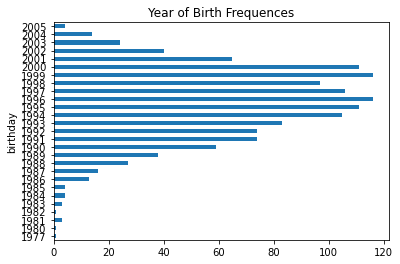

In [23]:
birthdays.plot.barh().set_title("Year of Birth Frequences");

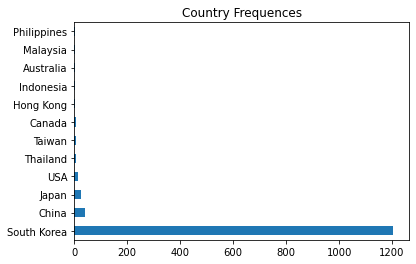

In [24]:
df_idols["country"].value_counts().plot.barh().set_title("Country Frequences");

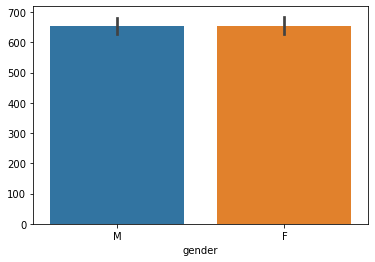

In [25]:
sns.barplot(x = "gender", y = df_idols.gender.index, data = df_idols);

## K-Pop Girl Groups

In [26]:
all_groups.head()

,Name,Short,Korean Name,Debut,gender,Company,Members,Orig. Memb.,Fanclub Name,Active
0,(G)I-DLE,NaN,(여자)아이들,2018-05-02,female,Cube,6,6,NaN,Yes
1,15&,NaN,피프틴앤드,2012-10-05,female,JYP,2,2,NaN,No
2,2EYES,NaN,투아이즈,2013-07-20,female,SidusHQ,4,5,NaN,No
3,2NE1,NaN,투애니원,2009-05-06,female,YG,4,4,Blackjack,No
4,3YE,NaN,써드아이,2019-05-21,female,GH,3,3,NaN,Yes


In [27]:
all_groups= all_groups.rename(columns={
    "Korean Name":"korean_name",
    "Orig. Memb." :"org_member",
    "Fanclub Name":"have_fclub",
})

In [28]:
all_groups.drop("korean_name",axis=1, inplace=True)

In [29]:
all_groups["Short"].fillna("no", inplace=True)
all_groups["have_fclub"].fillna("no", inplace=True)

In [30]:
i=0
for x in all_groups.have_fclub:
    if x != 'no':
        all_groups.have_fclub[i] = "yes"
    i+=1
    
i=0
for x in all_groups.Short:
    if x != 'no':
        all_groups.Short[i] = "yes"
    i+=1

C:\Users\HILAL-PC\AppData\Local\Temp/ipykernel_17196/3286742465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_groups.have_fclub[i] = "yes"
C:\Users\HILAL-PC\AppData\Local\Temp/ipykernel_17196/3286742465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_groups.have_fclub[i] = "yes"
C:\Users\HILAL-PC\AppData\Local\Temp/ipykernel_17196/3286742465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_groups.have_fclub[i] 

In [31]:
all_groups

,Name,Short,Debut,gender,Company,Members,org_member,have_fclub,Active
0,(G)I-DLE,no,2018-05-02,female,Cube,6,6,no,Yes
1,15&,no,2012-10-05,female,JYP,2,2,no,No
2,2EYES,no,2013-07-20,female,SidusHQ,4,5,no,No
3,2NE1,no,2009-05-06,female,YG,4,4,yes,No
4,3YE,no,2019-05-21,female,GH,3,3,no,Yes
...,...,...,...,...,...,...,...,...,...
142,VROMANCE,no,2016-06-12,male,RBW,4,4,no,Yes
143,Wanna One,no,2017-08-07,male,YMC,11,11,Wannable,No
144,We In The Zone,no,2019-05-27,male,Choon,5,5,no,Yes
145,WINNER,no,2014-08-12,male,YG,4,5,yes,Yes


In [32]:
all_groups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 146
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        299 non-null    object
 1   Short       299 non-null    object
 2   Debut       299 non-null    object
 3   gender      299 non-null    object
 4   Company     298 non-null    object
 5   Members     299 non-null    int64 
 6   org_member  299 non-null    int64 
 7   have_fclub  299 non-null    object
 8   Active      299 non-null    object
dtypes: int64(2), object(7)
memory usage: 31.5+ KB


In [33]:
all_groups.isnull().sum()

Name          0
Short         0
Debut         0
gender        0
Company       1
Members       0
org_member    0
have_fclub    0
Active        0
dtype: int64

In [34]:
all_groups.isnull().sum()

Name          0
Short         0
Debut         0
gender        0
Company       1
Members       0
org_member    0
have_fclub    0
Active        0
dtype: int64

In [35]:
months = all_groups["Debut"].apply(lambda x: x.split('-')[1])
months

0      05
1      10
2      07
3      05
4      05
       ..
142    06
143    08
144    05
145    08
146    01
Name: Debut, Length: 299, dtype: object

In [36]:
all_groups.insert(4,"debut_month",months)
all_groups

,Name,Short,Debut,gender,debut_month,Company,Members,org_member,have_fclub,Active
0,(G)I-DLE,no,2018-05-02,female,05,Cube,6,6,no,Yes
1,15&,no,2012-10-05,female,10,JYP,2,2,no,No
2,2EYES,no,2013-07-20,female,07,SidusHQ,4,5,no,No
3,2NE1,no,2009-05-06,female,05,YG,4,4,yes,No
4,3YE,no,2019-05-21,female,05,GH,3,3,no,Yes
...,...,...,...,...,...,...,...,...,...,...
142,VROMANCE,no,2016-06-12,male,06,RBW,4,4,no,Yes
143,Wanna One,no,2017-08-07,male,08,YMC,11,11,Wannable,No
144,We In The Zone,no,2019-05-27,male,05,Choon,5,5,no,Yes
145,WINNER,no,2014-08-12,male,08,YG,4,5,yes,Yes


In [37]:
all_groups["Debut"] = all_groups["Debut"].apply(lambda x: x.split('-')[0])
all_groups["Debut"]

0      2018
1      2012
2      2013
3      2009
4      2019
       ... 
142    2016
143    2017
144    2019
145    2014
146    2010
Name: Debut, Length: 299, dtype: object

In [38]:
all_groups= all_groups.rename(columns={
    "Debut":"debut_year"
})

In [39]:
girl_groups = all_groups[all_groups["gender"]=="female"]
girl_groups

,Name,Short,debut_year,gender,debut_month,Company,Members,org_member,have_fclub,Active
0,(G)I-DLE,no,2018,female,05,Cube,6,6,no,Yes
1,15&,no,2012,female,10,JYP,2,2,no,No
2,2EYES,no,2013,female,07,SidusHQ,4,5,no,No
3,2NE1,no,2009,female,05,YG,4,4,yes,No
4,3YE,no,2019,female,05,GH,3,3,no,Yes
...,...,...,...,...,...,...,...,...,...,...
147,We Girls,no,2018,female,08,Afternoon,8,8,no,Yes
148,Weki Meki,yes,2017,female,08,Fantagio,8,8,no,Yes
149,WJSN,yes,2016,female,02,Starship,13,12,yes,Yes
150,Wonder Girls,yes,2007,female,02,JYP,4,5,yes,No


In [40]:
girl_groups.Short.value_counts()

no     131
yes     21
Name: Short, dtype: int64

In [41]:
girl_groups.Company.value_counts()

SM            5
JYP           5
Cube          3
DSP           3
Happy Face    3
             ..
Hunus         1
iME           1
Leek Mill     1
D-SIDE        1
Addiction     1
Name: Company, Length: 120, dtype: int64

In [42]:
girl_groups.Members.value_counts()

4     40
5     38
6     20
3     17
7     13
2      9
8      7
9      3
10     2
12     2
13     1
Name: Members, dtype: int64

In [43]:
girl_groups.org_member.value_counts()

5     43
4     34
6     21
7     14
3     11
9      8
8      8
2      7
10     3
12     3
Name: org_member, dtype: int64

In [44]:
girl_groups.have_fclub.value_counts()

no     106
yes     46
Name: have_fclub, dtype: int64

In [45]:
girl_groups.have_fclub

0       no
1       no
2       no
3      yes
4       no
      ... 
147     no
148     no
149    yes
150    yes
151     no
Name: have_fclub, Length: 152, dtype: object

In [46]:
girl_groups.have_fclub.value_counts()

no     106
yes     46
Name: have_fclub, dtype: int64

In [47]:
debut_years = girl_groups.groupby("debut_year")["Name"].count()
debut_years

debut_year
1997     2
2001     1
2005     2
2006     1
2007     4
2008     1
2009     6
2010     4
2011    11
2012    13
2013     6
2014    13
2015    12
2016    17
2017    23
2018    22
2019    12
2020     2
Name: Name, dtype: int64

In [48]:
debut_months = girl_groups.groupby("debut_month")["Name"].count()
debut_months

debut_month
01    10
02    14
03    14
04     8
05    13
06    10
07    16
08    28
09     7
10    16
11    13
12     3
Name: Name, dtype: int64

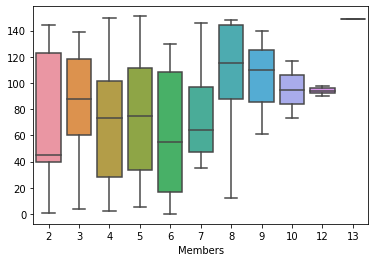

In [49]:
sns.boxplot(x="Members",y=girl_groups.Members.index,data =girl_groups);

In [50]:
girl_groups.Active.value_counts()

Yes       88
No        59
Hiatus     5
Name: Active, dtype: int64

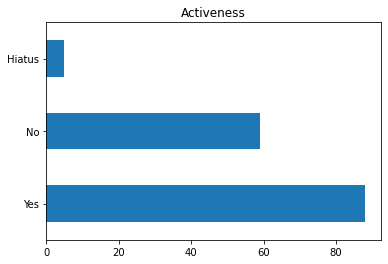

In [51]:
girl_groups.Active.value_counts().plot.barh().set_title("Activeness");

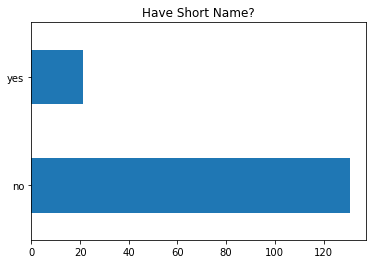

In [52]:
girl_groups.Short.value_counts().plot.barh().set_title("Have Short Name?");

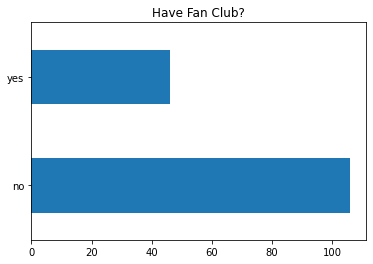

In [53]:
girl_groups.have_fclub.value_counts().plot.barh().set_title("Have Fan Club?");

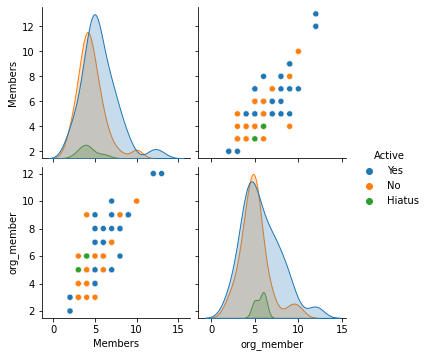

In [54]:
sns.pairplot(girl_groups, hue="Active");

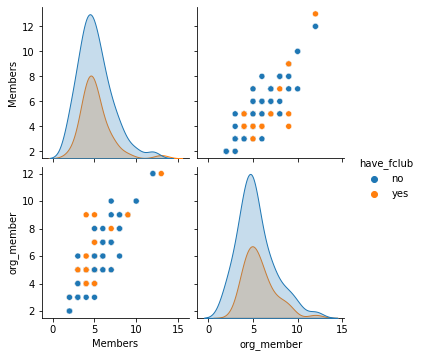

In [55]:
sns.pairplot(girl_groups, hue="have_fclub");

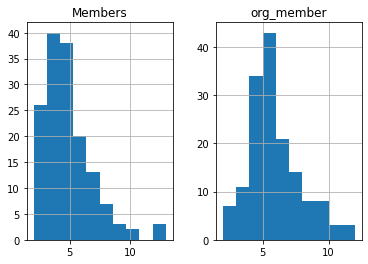

In [56]:
girl_groups.hist();

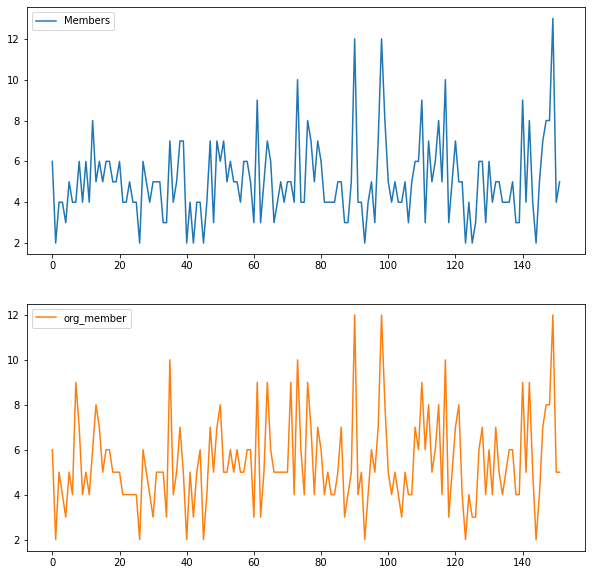

In [57]:
girl_groups.plot(subplots=True, figsize=(10, 10), sharex=False, sharey=False)
plt.show()

Text(0.5, 0.98, 'Debut Months')

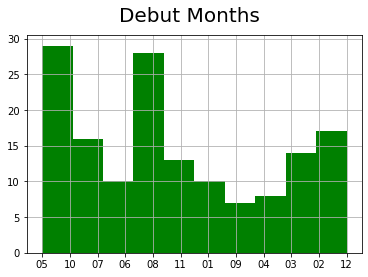

In [58]:
girl_groups.debut_month.hist(color="green");
suptitle("Debut Months", size=20)

Text(0.5, 0.98, 'Debut Years')

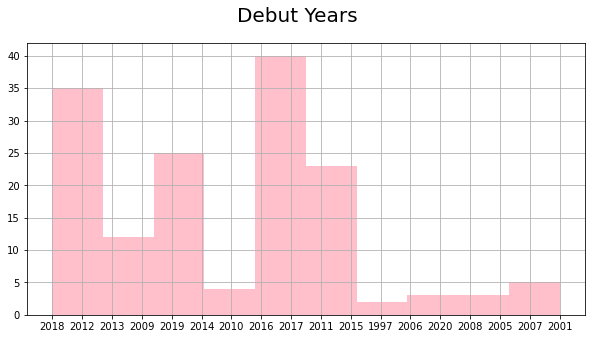

In [59]:
girl_groups.debut_year.hist(figsize = (10,5), color="pink");
suptitle("Debut Years", size=20)

## K-Pop Boy Groups

In [60]:
boy_groups = all_groups[all_groups["gender"]=="male"]
boy_groups

,Name,Short,debut_year,gender,debut_month,Company,Members,org_member,have_fclub,Active
0,100%,no,2012,male,09,TOP Media,4,7,Perfection,Yes
1,14U,no,2017,male,04,BG,14,14,no,Yes
2,1the9,no,2019,male,02,MBK,9,9,no,Yes
3,24K,no,2012,male,09,Choeun,8,6,yes,Yes
4,2AM,no,2008,male,06,"JYP, Big Hit",4,4,I Am,No
...,...,...,...,...,...,...,...,...,...,...
142,VROMANCE,no,2016,male,06,RBW,4,4,no,Yes
143,Wanna One,no,2017,male,08,YMC,11,11,Wannable,No
144,We In The Zone,no,2019,male,05,Choon,5,5,no,Yes
145,WINNER,no,2014,male,08,YG,4,5,yes,Yes


In [61]:
boy_groups.Short.value_counts()

no                 113
yes                 18
TVXQ                 1
Top Secret           1
SJ                   1
SKZ                  1
SVT                  1
SOC                  1
6KIES                1
MONT                 1
Beast                1
Hot Blood Youth      1
Darkbee              1
DMTN                 1
Bangtan Boys         1
BAP                  1
ACE                  1
VRVR                 1
Name: Short, dtype: int64

In [62]:
boy_groups.Company.value_counts()

SM              7
FNC             5
Big Hit         4
JYP             4
Starship        3
               ..
Histar          1
Rainbow         1
DNA             1
JYP, SidusHQ    1
Choon           1
Name: Company, Length: 110, dtype: int64

In [63]:
boy_groups.Members.value_counts()

5     38
6     24
4     23
7     22
9     12
3      8
2      7
10     4
8      2
11     2
12     2
14     1
18     1
13     1
Name: Members, dtype: int64

In [64]:
boy_groups.org_member.value_counts()

5     39
7     29
6     27
4     15
9     11
2      5
3      4
12     4
10     4
8      3
11     2
13     2
14     1
18     1
Name: org_member, dtype: int64

In [65]:
boy_groups.have_fclub.value_counts()

no                 64
yes                44
Carat               1
Tinker Bell         1
A+                  1
Monbebe             1
MYgirl              1
N.Fia               1
NCTzen              1
Rainzer             1
Yellowkies          1
Perfection          1
Cassiopeia          1
Shinhwa Changjo     1
Swing               1
Triple S            1
ELF                 1
ToppKlass           1
Alice               1
Wannable            1
Shawol              1
Club H.O.T          1
Inspirit            1
BBC                 1
I Am                1
Sweet Voice         1
Choice              1
ABNEW               1
BABY                1
BANA                1
Prism               1
Bestfriend          1
Grace               1
Melody              1
Crown               1
Boice               1
EXO-L               1
Primadonna          1
Fan God             1
I GOT7              1
ZE:A Style          1
Name: have_fclub, dtype: int64

In [66]:
boy_groups.have_fclub

0      Perfection
1              no
2              no
3             yes
4            I Am
          ...    
142            no
143      Wannable
144            no
145           yes
146    ZE:A Style
Name: have_fclub, Length: 147, dtype: object

In [67]:
boy_groups.have_fclub.value_counts()

no                 64
yes                44
Carat               1
Tinker Bell         1
A+                  1
Monbebe             1
MYgirl              1
N.Fia               1
NCTzen              1
Rainzer             1
Yellowkies          1
Perfection          1
Cassiopeia          1
Shinhwa Changjo     1
Swing               1
Triple S            1
ELF                 1
ToppKlass           1
Alice               1
Wannable            1
Shawol              1
Club H.O.T          1
Inspirit            1
BBC                 1
I Am                1
Sweet Voice         1
Choice              1
ABNEW               1
BABY                1
BANA                1
Prism               1
Bestfriend          1
Grace               1
Melody              1
Crown               1
Boice               1
EXO-L               1
Primadonna          1
Fan God             1
I GOT7              1
ZE:A Style          1
Name: have_fclub, dtype: int64

In [68]:
debut_years = boy_groups.groupby("debut_year")["Name"].count()
debut_years

debut_year
1995     1
1996     1
1997     1
1998     1
1999     2
2003     1
2004     2
2005     2
2006     1
2007     3
2008     4
2009     2
2010     8
2011     7
2012    13
2013     6
2014    15
2015    12
2016    12
2017    26
2018    11
2019    14
2020     2
Name: Name, dtype: int64

In [69]:
debut_months = boy_groups.groupby("debut_month")["Name"].count()
debut_months

debut_month
01    17
02     4
03    10
04    15
05    15
06    11
07    14
08    13
09    14
10    20
11    12
12     2
Name: Name, dtype: int64

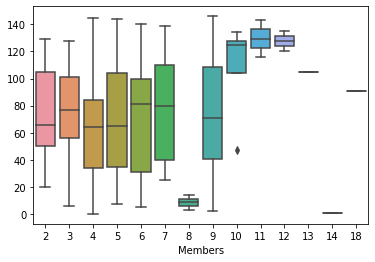

In [70]:
sns.boxplot(x="Members",y=boy_groups.Members.index,data =boy_groups);

In [71]:
boy_groups.Active.value_counts()

Yes       110
No         33
Hiatus      4
Name: Active, dtype: int64

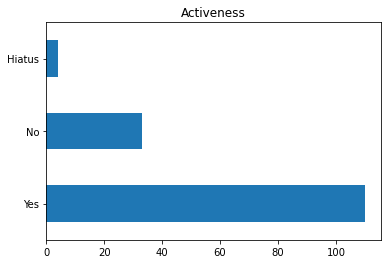

In [72]:
boy_groups.Active.value_counts().plot.barh().set_title("Activeness");

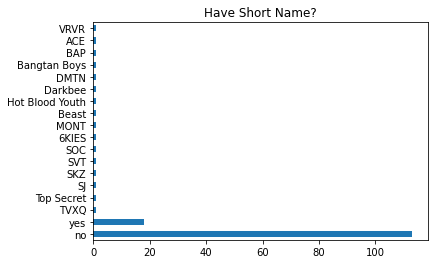

In [73]:
boy_groups.Short.value_counts().plot.barh().set_title("Have Short Name?");

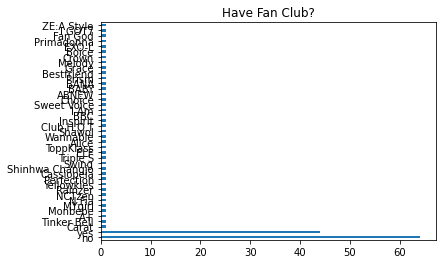

In [74]:
boy_groups.have_fclub.value_counts().plot.barh().set_title("Have Fan Club?");

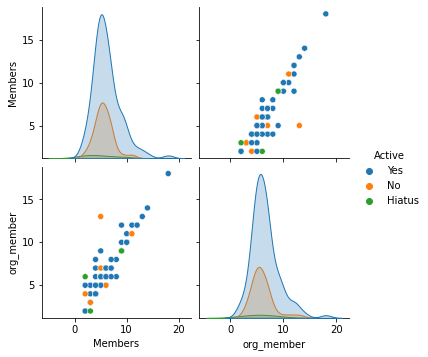

In [75]:
sns.pairplot(boy_groups, hue="Active");

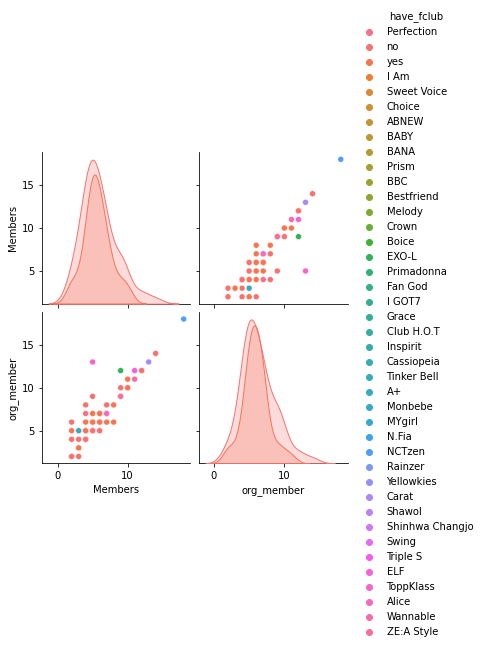

In [76]:
sns.pairplot(boy_groups, hue="have_fclub");

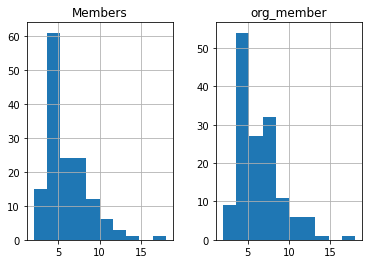

In [77]:
boy_groups.hist();

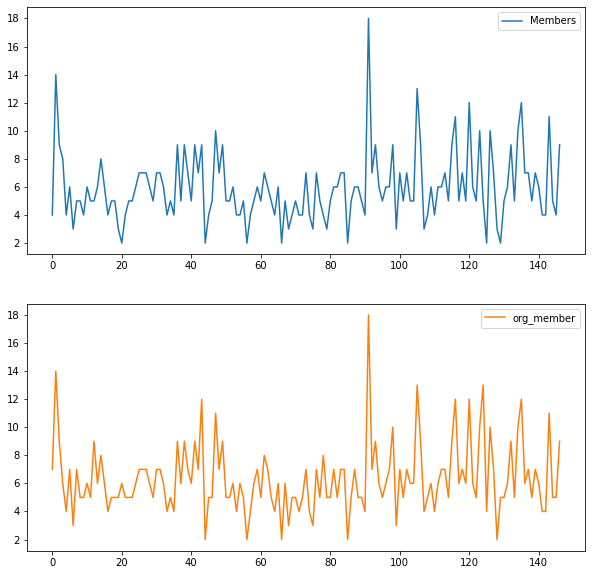

In [78]:
boy_groups.plot(subplots=True, figsize=(10, 10), sharex=False, sharey=False)
plt.show()

Text(0.5, 0.98, 'Debut Months')

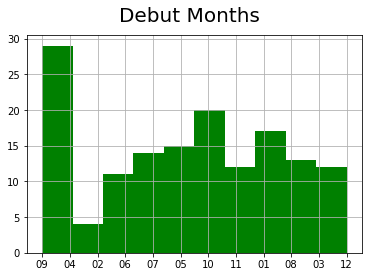

In [79]:
boy_groups.debut_month.hist(color="green");
suptitle("Debut Months", size=20)

Text(0.5, 0.98, 'Debut Years')

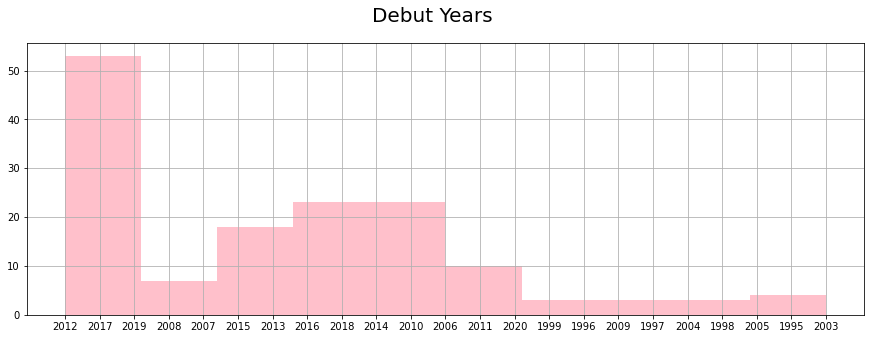

In [80]:
boy_groups.debut_year.hist(figsize = (15,5), color="pink");
suptitle("Debut Years", size=20)